# Get the data

https://www.ncei.noaa.gov/data/oceans/ndbc/hfradar/radial/2024/202407/WHOI/NWTP/RDL_WHOI_NWTP_2024_07_31_2315.ruv

In [1]:
import requests, shutil

def form_url(site, year, month, day, hour, minute):
    
    sub_file = 'RDL_WHOI_{site}_{year}_{month}_{day}_{hour}{min}.ruv'.format(site=site, year=year, month=str(month).zfill(2), day=str(day).zfill(2), hour=str(hour).zfill(2), min=str(minute).zfill(2))
    return sub_file, 'https://www.ncei.noaa.gov/data/oceans/ndbc/hfradar/radial/{year}/{year}{month}/WHOI/{site}/{sub_file}'.format(site=site, year=year, month=str(month).zfill(2), sub_file=sub_file)


sub_file, url = form_url('NWTP', 2024, 7, 31, 23, 15)

url

'https://www.ncei.noaa.gov/data/oceans/ndbc/hfradar/radial/2024/202407/WHOI/NWTP/RDL_WHOI_NWTP_2024_07_31_2315.ruv'

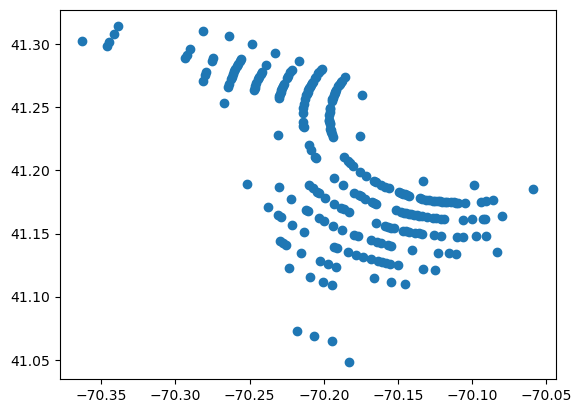

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, os

def pull_text(url, sub_file, savedir='.'):

    # sub_file, url = form_url(site, year, month, day, hour, minute)

    file = requests.get(url, stream=True)
    dump = file.raw

    with open(os.path.join(savedir, sub_file), 'wb') as fn:
        shutil.copyfileobj(dump, fn)

def read_text(sub_file, savedir='.'):

    with open(os.path.join(savedir, sub_file), 'rt') as fn:
        lines = fn.readlines()

    sind = matches = [i for i, x in enumerate(lines) if '%TableStart:' in x]
    if len(sind) == 0:
        return None, None
    sind = sind[0]+3
    eind = matches = [i for i, x in enumerate(lines) if '%TableEnd:' in x][0]

    clines = lines[sind:eind]

    def parse_line(cline):

        clinen = [float(x) for x in cline.split()]
        
        return np.array(clinen)

    clists = [parse_line(cline) for cline in clines]
    clists

    data = np.array(clists)
    data.shape

    if '.ruv' in sub_file:
        cols = ['Longitude' , 'Latitude',    'U comp' ,  'V comp', 'Spatial Error',  'Spatial Count',  'Temporal Count', 'X Distance',  'Y Distance',  'Range', 'Bearing', 'Velocity', 'Direction', 'Spectra']
    elif '.hfrss10lluv' in sub_file:
        cols = ['Longitude' , 'Latitude',    'U comp' ,  'V comp', 'Spatial Count',  'Temporal Count', 'X Distance',  'Y Distance',  'Range', 'Bearing', 'Velocity', 'Direction', 'Spectra']
    # cols = lines[sind-2].split()[1::]
    len(cols)
    dataframe = pd.DataFrame(data, columns=cols)

    return sub_file, dataframe

pull_text(url, sub_file)
sub_file, dataframe = read_text(sub_file, savedir='.')

plt.plot(dataframe['Longitude'], dataframe['Latitude'], 'o')

Plotting Coast
Selected resolution: h


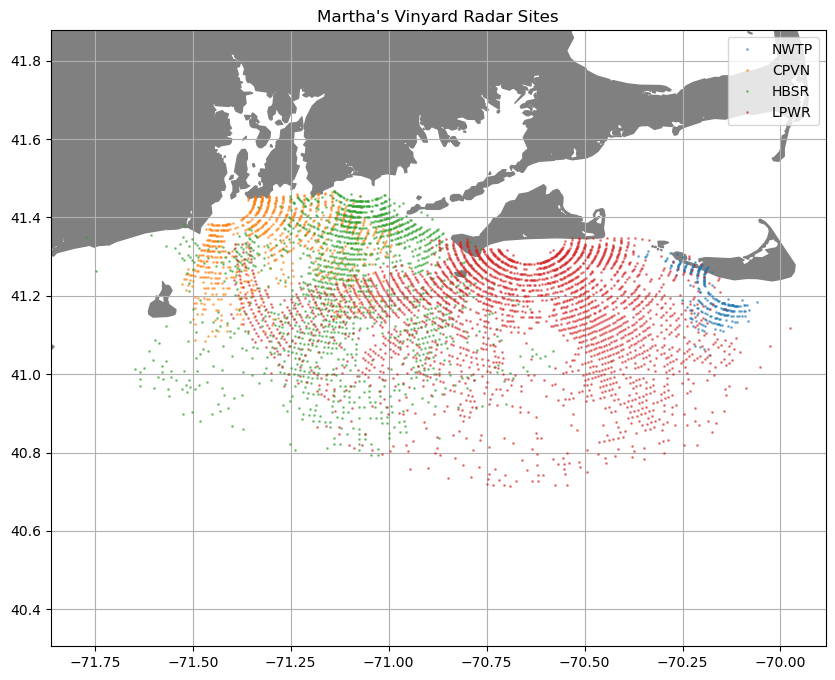

In [3]:
plt.figure(figsize=(10, 8))
import afloat.plot.plotting as zplot

for site in ['NWTP', 'PTWN', 'SBSR', 'CPVN', 'ESPT', 'FOCF', 'HBSR', 'LPWR']:
    
    sub_file, url = form_url(site, 2024, 7, 31, 23, 15)

    pull_text(url, sub_file)
    sub_file, dataframe = read_text(sub_file, savedir='.')
    if dataframe is not None:
        plt.plot(dataframe['Longitude'], dataframe['Latitude'], 'o', alpha=0.5, ms=1, label=site)

plt.axis('equal')
plt.legend()
plt.grid()
print('Plotting Coast')
zplot.global_coast_fill(resolution='h')
plt.title("Martha's Vinyard Radar Sites")
plt.savefig('marthas_vinyard_radar_sites.png')


In [4]:
from bs4 import BeautifulSoup

url = 'https://www.ncei.noaa.gov/data/oceans/ndbc/hfradar/radial/2024/202407/WHOI/'
page = requests.get(url).text


print(page)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>Index of /data/oceans/ndbc/hfradar/radial/2024/202407/WHOI</title>
 </head>
 <body>
<h1>Index of /data/oceans/ndbc/hfradar/radial/2024/202407/WHOI</h1>
  <table>
   <tr><th valign="top"><img src="/icons/blank.gif" alt="[ICO]"></th><th><a href="?C=N;O=D">Name</a></th><th><a href="?C=M;O=A">Last modified</a></th><th><a href="?C=S;O=A">Size</a></th><th><a href="?C=D;O=A">Description</a></th></tr>
   <tr><th colspan="5"><hr></th></tr>
<tr><td valign="top"><img src="/icons/back.gif" alt="[PARENTDIR]"></td><td><a href="/data/oceans/ndbc/hfradar/radial/2024/202407/">Parent Directory</a></td><td>&nbsp;</td><td align="right">  - </td><td>&nbsp;</td></tr>
<tr><td valign="top"><img src="/icons/folder.gif" alt="[DIR]"></td><td><a href="CPVN/">CPVN/</a></td><td align="right">2024-08-24 16:08  </td><td align="right">  - </td><td>&nbsp;</td></tr>
<tr><td valign="top"><img src="/icons/folder.gif" alt="[DIR]"></td><td><a hr

NameError: name 'np' is not defined

In [5]:
year = 2024
month = 7

def find_owners(year, month):

    yearmonthurl = 'https://www.ncei.noaa.gov/data/oceans/ndbc/hfradar/radial/{year}/{year}{month}/'.format(year=year, month=str(month).zfill(2))
    page = requests.get(yearmonthurl).text

    # Use BeautifulSoup to parse out links to folders 
    soup = BeautifulSoup(page, 'html.parser')
    ext='/'
    links = [url + '/' + node.get('href') for node in soup.find_all('a') if node.get('href').endswith(ext)]

    # Skip the first link, which is the parent directory
    links = links[1:]
    links

    # GET THE SITES 
    sites = [links[i].split('/')[-2] for i in range(len(links))]
    
    return sites


def find_sites(year, month, owner='WHOI'):

    yearmonthurl = 'https://www.ncei.noaa.gov/data/oceans/ndbc/hfradar/radial/{year}/{year}{month}/{owner}/'.format(owner=owner, year=year, month=str(month).zfill(2))
    page = requests.get(yearmonthurl).text

    # Use BeautifulSoup to parse out links to folders 
    soup = BeautifulSoup(page, 'html.parser')
    ext='/'
    links = [url + '/' + node.get('href') for node in soup.find_all('a') if node.get('href').endswith(ext)]

    # Skip the first link, which is the parent directory
    links = links[1:]
    links

    # GET THE SITES 
    sites = [links[i].split('/')[-2] for i in range(len(links))]
    
    return sites

def find_files(year, month, site, owner='WHOI', ext='.hfrss10lluv'):

    siteurl = 'https://www.ncei.noaa.gov/data/oceans/ndbc/hfradar/radial/{year}/{year}{month}/{owner}/{site}'.format(owner='WHOI', site=site, year=year, month=str(month).zfill(2))

    print(siteurl)
    page = requests.get(siteurl).text

    # Use BeautifulSoup to parse out links to folders 
    soup = BeautifulSoup(page, 'html.parser')
    
    links = [url + '/' + node.get('href') for node in soup.find_all('a') if node.get('href').endswith(ext)]

    # Skip the first link, which is the parent directory
    # links = links[1:]
    links

    # GET THE LINKS 
    files = [links[i].split('/')[-1] for i in range(len(links))]
    
    return siteurl, files

find_sites(year, month)


['CPVN', 'ESPT', 'FOCF', 'HBSR', 'LPWR', 'NWTP', 'PTWN', 'SBSR']

In [6]:
year, month = 2014, 7
find_files(year, month, site)

https://www.ncei.noaa.gov/data/oceans/ndbc/hfradar/radial/2014/201407/WHOI/LPWR


('https://www.ncei.noaa.gov/data/oceans/ndbc/hfradar/radial/2014/201407/WHOI/LPWR',
 ['RDL_m_WHOI_LPWR_2014_07_01_1415.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1430.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1445.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1500.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1515.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1530.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1545.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1600.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1615.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1630.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1645.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1700.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1715.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1730.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1745.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1800.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1815.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_01_1830.hfrss10lluv',
  'RDL_m_WHOI_LPWR_2014_07_07_1915

# Big dirty loop


In [ ]:

all_sites = {}
for year in range(2006, 2025):
    for month in range(1, 13):

        ymstr = str(year) + '_' + str(month).zfill(2)
        owners = find_owners(year, month)

        print(ymstr)

        for owner in owners:
            print('     ' + owner)

            sites = find_sites(year, month, owner=owner)

            if len (sites) > 0 and 'LPWR' in sites:
                all_sites[ymstr + '_' + owner] = sites
                print(sites)

                files = find_files(year, month, site)

                # for file in files:
                    


2006_01
2006_02
2006_03
2006_04
2006_05
2006_06
2006_07
2006_08
2006_09
2006_10


In [ ]:

# all_sites = {}
# for year in range(2014, 2025):
#     for month in range(1, 13):

#         ymstr = str(year) + '_' + str(month).zfill(2)

#         print(ymstr)
        
#         # Find all whoi sites
#         sites = find_sites(year, month)

#         if len (sites) > 0 and 'LPWR' in sites:
#             print(sites)
#             all_sites[ymstr] = sites

#             # files = find_files(year, month, site)
#             error
#         # sub_file, dataframe = pull_text(site, 2024, 7, 31, 23, 15)
#         # if dataframe is not None:
#         #     plt.plot(dataframe['Longitude'], dataframe['Latitude'], 'o', alpha=0.5, ms=1, label=site)
            


# Eras
We can see a few different 'Eras' in the above 

# 2014

In [8]:
all_sites = {}
cols = ['r', 'g', 'b']

savedir='./2014'
if not os.path.exists(savedir):
    os.makedirs(savedir)

labsmade = []
for year in range(2014, 2016):
    for month in range(8, 9):

        ymstr = str(year) + '_' + str(month).zfill(2)

        print(ymstr)
        
        # Find all whoi sites
        sites = find_sites(year, month)

        if sites == ['LPWR', 'METS', 'SQUB']:
            print(sites)
            all_sites[ymstr] = sites

            # for i, site in enumerate(sites):
            for i, site in enumerate(['METS', 'SQUB']):

                print(site)
                
                sitesavedir = os.path.join(savedir, site)
                if not os.path.exists(sitesavedir):
                    os.makedirs(sitesavedir)
                # sub_file, dataframe = pull_text(site, year, month, 31, 23, 15)

                siteurl, files = find_files(year, month, site)

                for file in files:
                    
                    pull_text(siteurl + '/' + file, file, savedir=sitesavedir)

                    if False:
                        sub_file, dataframe = read_text(file, savedir=sitesavedir)

                        print('     '+sub_file)
                        
                        lab = site
                        if site in labsmade:
                            lab = None
                        plt.plot(dataframe['Longitude'], dataframe['Latitude'], 'o', color=cols[i], alpha=0.1, ms=1, label=lab)

                        labsmade += [site]
                        
            # if dataframe is not None:
            #     plt.plot(dataframe['Longitude'], dataframe['Latitude'], 'o', alpha=0.5, ms=1, label=site)
            

2014_08
['LPWR', 'METS', 'SQUB']
METS
https://www.ncei.noaa.gov/data/oceans/ndbc/hfradar/radial/2014/201408/WHOI/METS
SQUB
https://www.ncei.noaa.gov/data/oceans/ndbc/hfradar/radial/2014/201408/WHOI/SQUB
2015_08


In [ ]:
siteurl, files = find_files(year, month, site)
for file in files:
                    
    sub_file, dataframe = pull_text(siteurl + '/' + file, file)

https://www.ncei.noaa.gov/data/oceans/ndbc/hfradar/radial/2014/201407/WHOI/LPWR


In [ ]:
siteurl

'https://www.ncei.noaa.gov/data/oceans/ndbc/hfradar/radial/2014/201407/WHOI/LPWR'